# Model Training

In [1]:
import pandas as pd
import numpy as np
import warnings
import os
warnings.filterwarnings("ignore")
import sys
sys.path.append('../')
from utils.machine_learning import DataPreprocess, ModelTraining, MetricsVisualizations

In [2]:
preprocess = DataPreprocess()
trainer = ModelTraining()

# Data

In [3]:
df = pd.read_csv("./Data/model_training_dataset.csv")

In [4]:
df.head()

,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,calculado_host_listings_count,distance_to_empire_state
0,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,0.600689
1,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,7.687548
2,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,6.588923
3,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,1,0.897823
4,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,1,7.291151


# Preprocessing the Data

### Based on the information gathered during **Feature Engineering**:
- `minimo_noites`, `numero_de_reviews`and `calculado_host_listings_count` = Log Transformation
- `distance_to_empire_state` = Cubic Transformation
- `latitude` and `longitude` = No transformation needed

### For the preprocess step, the data will be divided into a train and test split. Also, onehot encoding will be performed on the categorical columns of the dataset, and the numerical columns will be transformed using the log and cubic transformations, then they will be scaled using the Robust Scaler in reason of the outliers. The preprocessors will be saved on the **Artifacts** folder.

### Since the **EDA** showed that `bairro` has 220 different values, encoding this feature will increase a lot the dimension of the dataset to train the models. Since the feature was considered statistically significant during **Feature Engineering**, the models will be trained two times, one with `bairro` and another without. With this, it will be possible to compare the model's results and see if the added dimensions are worth the extra computational cost

In [5]:
X_train_without_bairro, X_test_without_bairro, y_train_without_bairro, y_test_without_bairro = preprocess.preprocess_data(df, test_size=0.3, target_name="price")
X_train_with_bairro, X_test_with_bairro, y_train_with_bairro, y_test_with_bairro = preprocess.preprocess_data(df, test_size=0.3, target_name="price", bairro_column=True)

# Modeling

### For the modeling phase, four models will be used: **Ridge**, **Lasso**, **Random Forest** and **XGBoost**. These models were chosen because of the non-linear relationship between the majority of the numerical columns and the target `price`, so using Linear Regression wouldn't make any sense in this case. Also, these models work well when there are a lot of outliers in the data, like in this case

### After the models are trained and tested, they will be evaluated in terms of the metrics `MAE` and `RMSE`, to see the error of the models in the same unit as the prices, and `R²` to see how much of the variability of the data the model can explain, along with a visualization of the residuals. Also, all features of each model will be plotted in relation to the increase in MAE (or top 15 for the models trained with `bairro`), to check if any transformation, or if the feature created, was successful or not in terms of importance to the model

### To train the models, `RandomSearchCV` will be used to fine tune them and use cross-validation. Also, a repo in DagsHub will be used, along with MLflow to keep track of all the information about the models

# Model Training

## Without `bairro`

In [8]:
model_report_without_bairro = trainer.initiate_model_trainer((X_train_without_bairro, y_train_without_bairro, X_test_without_bairro, y_test_without_bairro), "Rent Price Pred")

2025/02/06 08:52:26 INFO mlflow.tracking.fluent: Experiment with name 'Rent Price Pred' does not exist. Creating a new experiment.
2025/02/06 08:52:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'Ridge - Rent Price Pred'.
2025/02/06 08:52:41 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Ridge - Rent Price Pred, version 1
Created version '1' of model 'Ridge - Rent Price Pred'.


🏃 View run Ridge at: https://dagshub.com/vitorccmanso/LH_CD_VITOR-CUNHA.mlflow/#/experiments/6/runs/7509b0d8371949aba9b0a41b71c5c663
🧪 View experiment at: https://dagshub.com/vitorccmanso/LH_CD_VITOR-CUNHA.mlflow/#/experiments/6


2025/02/06 08:52:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'Lasso - Rent Price Pred'.
2025/02/06 08:52:54 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Lasso - Rent Price Pred, version 1
Created version '1' of model 'Lasso - Rent Price Pred'.


🏃 View run Lasso at: https://dagshub.com/vitorccmanso/LH_CD_VITOR-CUNHA.mlflow/#/experiments/6/runs/3272eb3bdab645adb53502a615c8b657
🧪 View experiment at: https://dagshub.com/vitorccmanso/LH_CD_VITOR-CUNHA.mlflow/#/experiments/6


2025/02/06 11:08:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'Random Forest - Rent Price Pred'.
2025/02/06 11:10:59 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Random Forest - Rent Price Pred, version 1
Created version '1' of model 'Random Forest - Rent Price Pred'.


🏃 View run Random Forest at: https://dagshub.com/vitorccmanso/LH_CD_VITOR-CUNHA.mlflow/#/experiments/6/runs/b2dcae2620be49628e54b55c8c5feec1
🧪 View experiment at: https://dagshub.com/vitorccmanso/LH_CD_VITOR-CUNHA.mlflow/#/experiments/6


2025/02/06 11:12:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'XGBoost - Rent Price Pred'.
2025/02/06 11:12:20 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBoost - Rent Price Pred, version 1
Created version '1' of model 'XGBoost - Rent Price Pred'.


🏃 View run XGBoost at: https://dagshub.com/vitorccmanso/LH_CD_VITOR-CUNHA.mlflow/#/experiments/6/runs/77d95bf1609b4051ae487606185086e1
🧪 View experiment at: https://dagshub.com/vitorccmanso/LH_CD_VITOR-CUNHA.mlflow/#/experiments/6


## Model Performance

In [26]:
metrics_without_bairro = MetricsVisualizations(model_report_without_bairro)

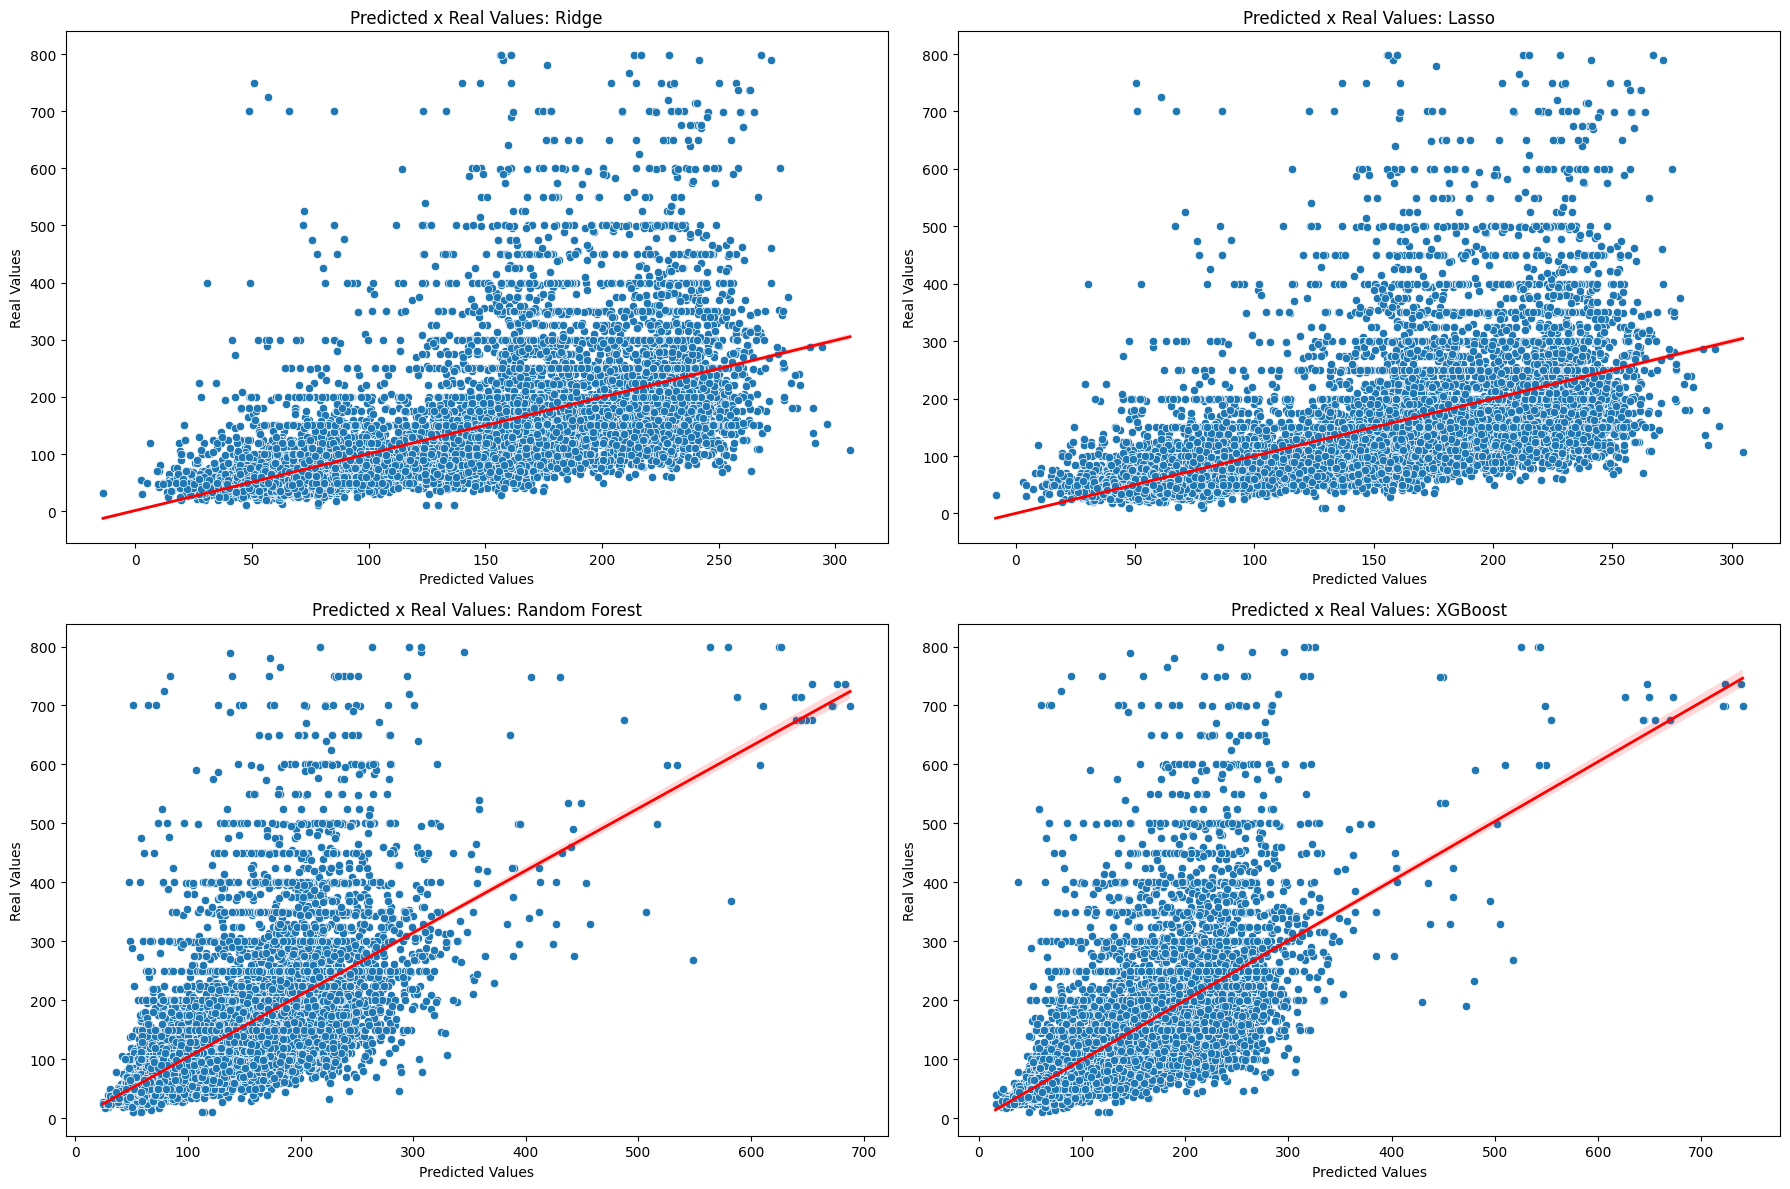

In [27]:
metrics_without_bairro.plot_pred_x_real(y_test_without_bairro, 2, 2)

In [29]:
df[df["price"] > 400].shape

(1238, 10)

In [28]:
df_metrics_without_bairro = pd.DataFrame.from_dict(model_report_without_bairro, orient='index')
df_metrics_without_bairro.drop(columns=["model", "y_pred"])

,mae,rmse,r2
Ridge,51.821268,83.525334,0.357120
Lasso,51.791590,83.527826,0.357082
Random Forest,44.891474,76.408292,0.462010
XGBoost,46.812862,76.385155,0.462336


### Observations:
- All struggle to correctly predict prices that are too high, likely due to the fact that from prices of 400 dollars and up, there's only 2.5% of the total data
- Ridge and Lasso showed the same performance, with their regularization term being able to handle the non-linear relations
- The ensemble models had a small improvement int terms of `RSME`, but a very good improvement on `R²`
- Random Forest and XGBoost had the same R² score, but both had a better `MAE` than the other models
- Based on the metrics, the Random Forest model is the best one, with the lowest errors and with a `R²` score tied with XGBoost

## Residual Analysis

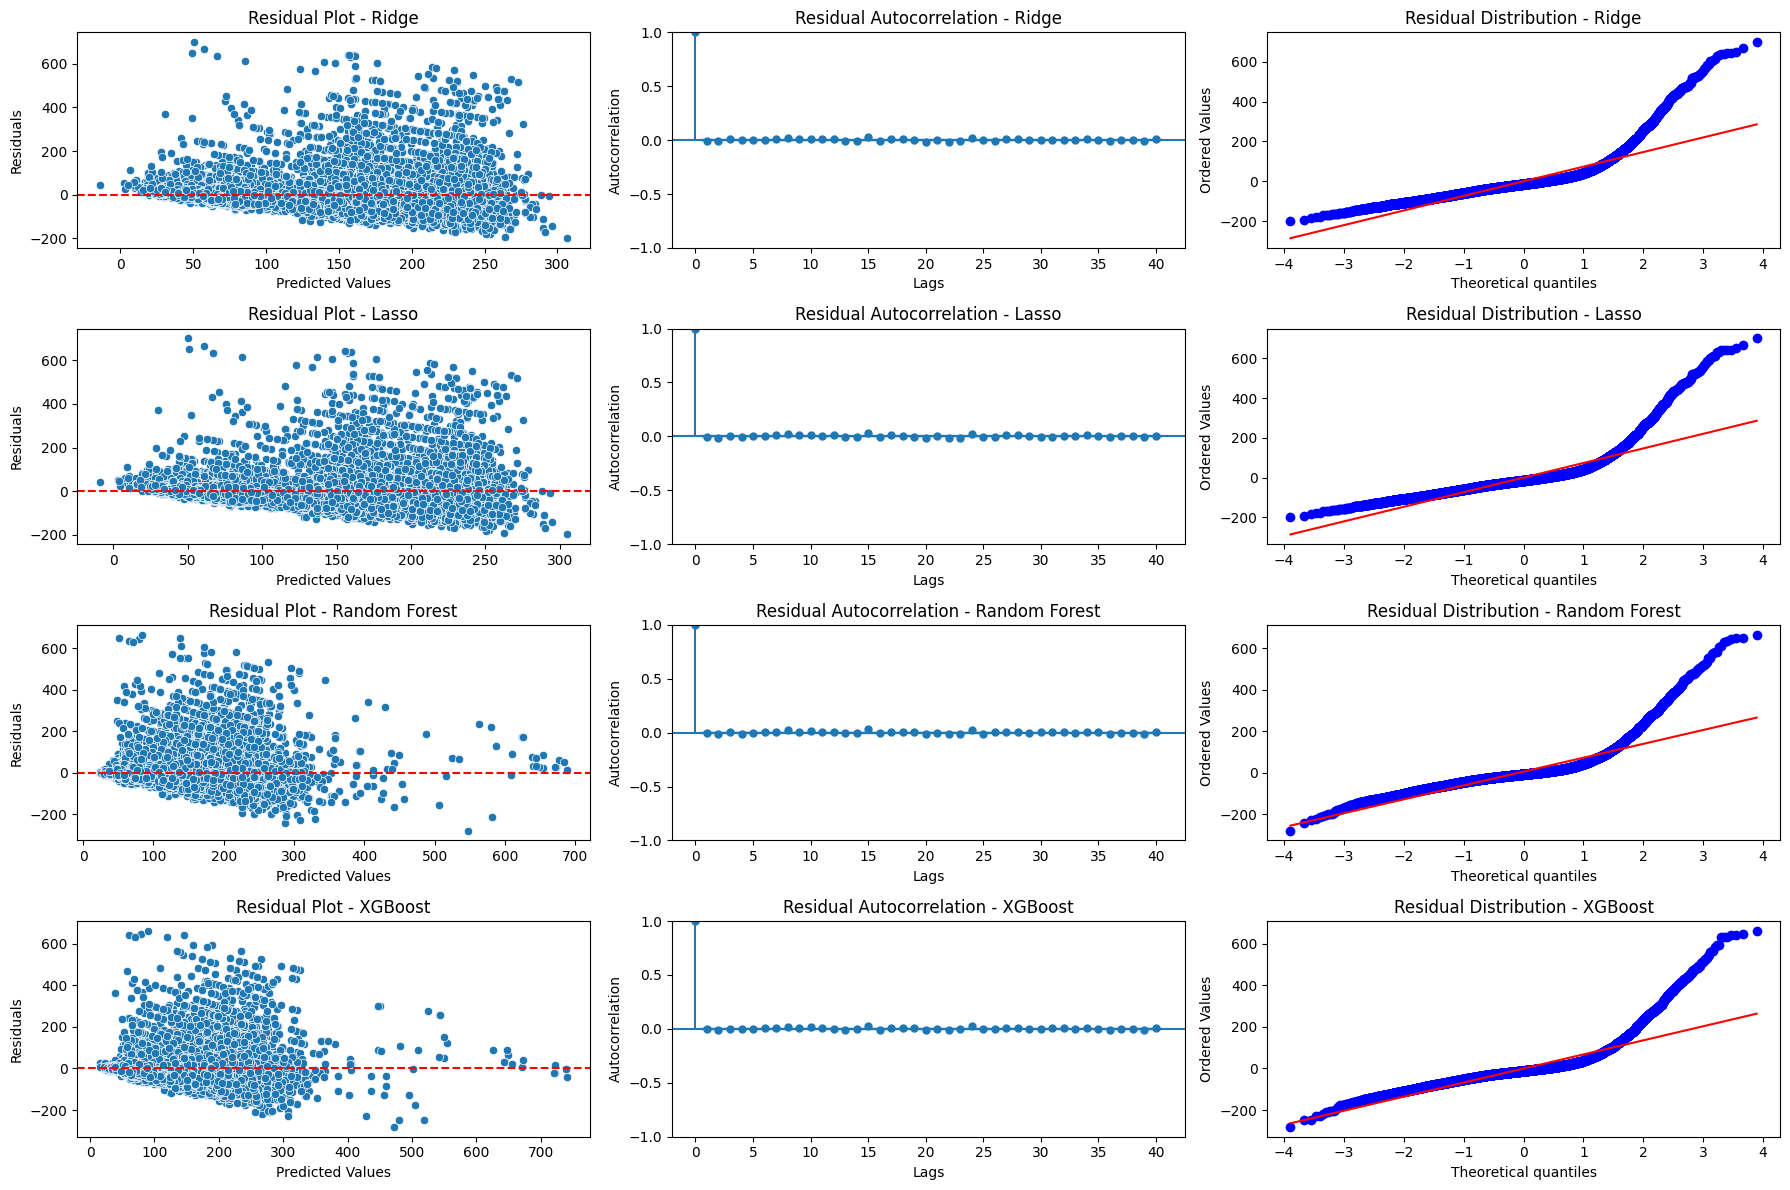

In [31]:
metrics_without_bairro.plot_residuals(y_test_without_bairro, 4, 3)

### Observations:
- The residuals of all models behave basically in the same way
- No model has autocorrelated residuals, indicating that the errors of the model are independent of each other, which can be considered a good thing, since this tends to show that the model has captured the pattern in the data, with only noise in the residuals
- Despite no autocorrelation, no model was able to have residuals with a normal distribution, indicating that no model is capturing the full variability of the data
- With a combination of non-normal residuals and low R² scores, is clear that no model was able to capture all non-linear relations between the data, and they are not ideal models statistically speaking

## Feature Importance

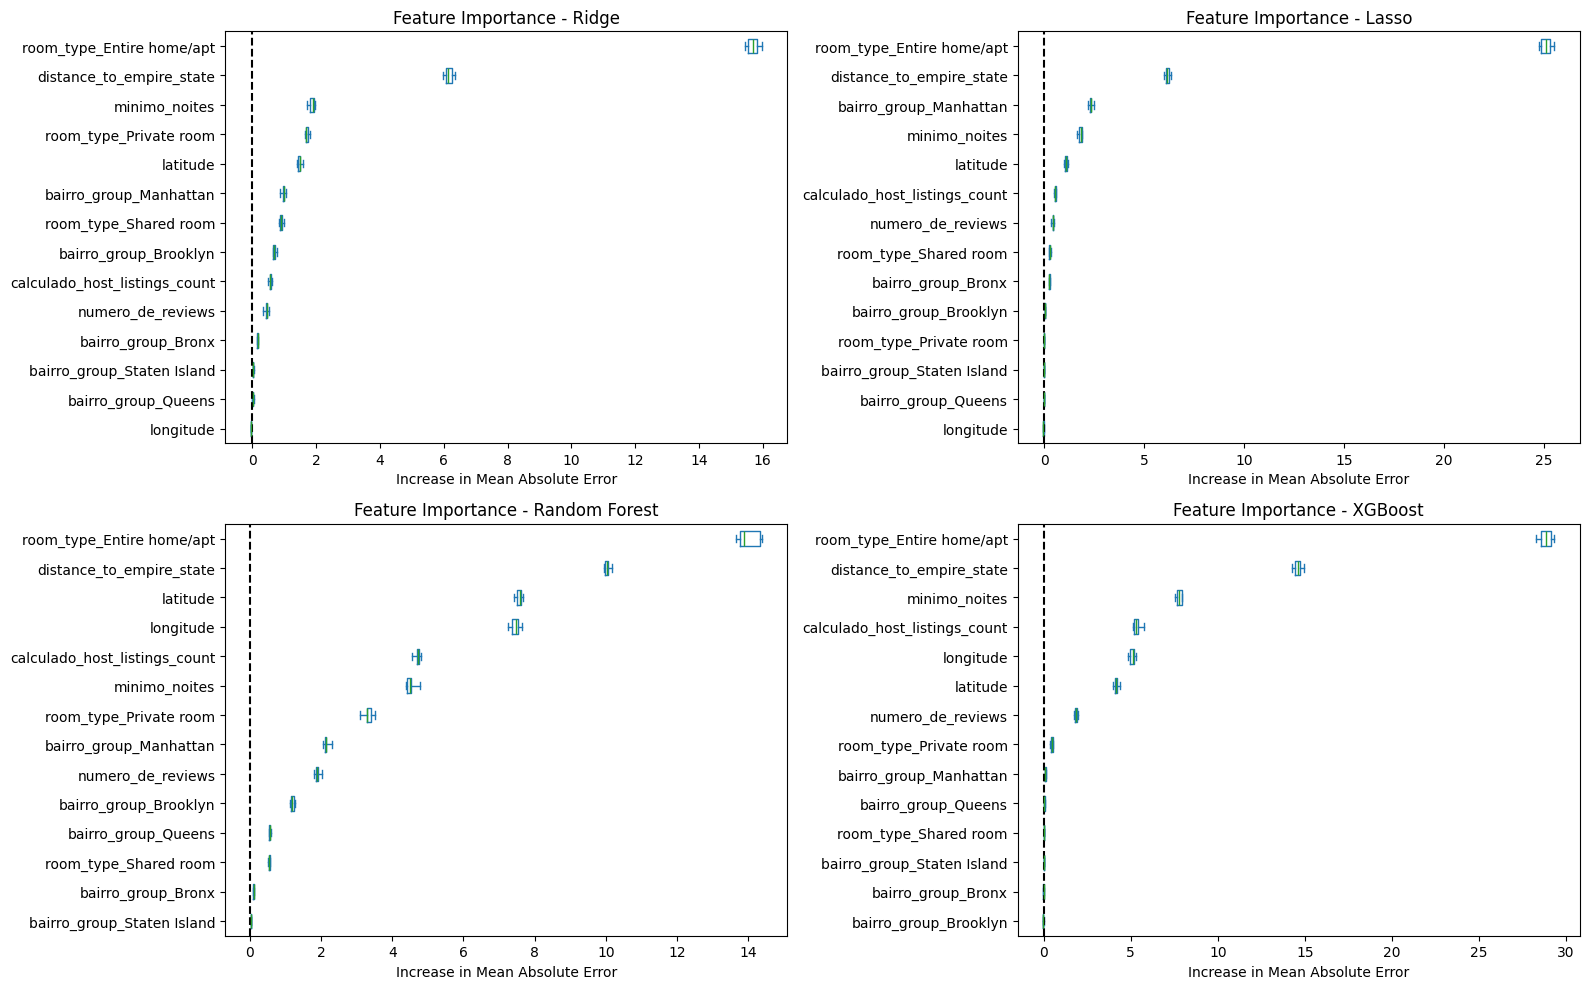

In [32]:
metrics_without_bairro.plot_feature_importance(y_test=y_test_without_bairro, X_test=X_test_without_bairro, rows=2, columns=2)

### Observations:
- All models have the exact same top 2 most important features, with the category of **Entire home/apt** of  `room_type` being by far the most important feature. When the values of this feature are permutated, `MAE` tends to increase from 14 to 30 depending on the model
- All models have the created feature `distance_to_empire_state` as the second most important feature
- `minimo_noites` is also a column that appear in the top 5 most important one for every model, except the random forest, where it ranks number 6

## With `bairro`

In [14]:
model_report_with_bairro = trainer.initiate_model_trainer((X_train_with_bairro, y_train_with_bairro, X_test_with_bairro, y_test_with_bairro), "Rent Price Pred", bairro_column=True)

2025/02/06 11:39:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'Ridge - Rent Price Pred' already exists. Creating a new version of this model...
2025/02/06 11:39:54 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Ridge - Rent Price Pred, version 2
Created version '2' of model 'Ridge - Rent Price Pred'.


🏃 View run Ridge at: https://dagshub.com/vitorccmanso/LH_CD_VITOR-CUNHA.mlflow/#/experiments/6/runs/53757f0c13cb4fa6bbb9b082a62d57be
🧪 View experiment at: https://dagshub.com/vitorccmanso/LH_CD_VITOR-CUNHA.mlflow/#/experiments/6


2025/02/06 11:40:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'Lasso - Rent Price Pred' already exists. Creating a new version of this model...
2025/02/06 11:40:39 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Lasso - Rent Price Pred, version 2
Created version '2' of model 'Lasso - Rent Price Pred'.


🏃 View run Lasso at: https://dagshub.com/vitorccmanso/LH_CD_VITOR-CUNHA.mlflow/#/experiments/6/runs/ca2914e377204d4c9ee5a54c93a5b918
🧪 View experiment at: https://dagshub.com/vitorccmanso/LH_CD_VITOR-CUNHA.mlflow/#/experiments/6


2025/02/06 16:10:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'Random Forest - Rent Price Pred' already exists. Creating a new version of this model...
2025/02/06 16:11:39 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Random Forest - Rent Price Pred, version 2
Created version '2' of model 'Random Forest - Rent Price Pred'.


🏃 View run Random Forest at: https://dagshub.com/vitorccmanso/LH_CD_VITOR-CUNHA.mlflow/#/experiments/6/runs/117a484ef1574cca89fd947d4bc60fbe
🧪 View experiment at: https://dagshub.com/vitorccmanso/LH_CD_VITOR-CUNHA.mlflow/#/experiments/6


2025/02/06 16:13:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'XGBoost - Rent Price Pred' already exists. Creating a new version of this model...
2025/02/06 16:13:20 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBoost - Rent Price Pred, version 2
Created version '2' of model 'XGBoost - Rent Price Pred'.


🏃 View run XGBoost at: https://dagshub.com/vitorccmanso/LH_CD_VITOR-CUNHA.mlflow/#/experiments/6/runs/dc7ec0d7a7b64f628556f9f9d4ee4903
🧪 View experiment at: https://dagshub.com/vitorccmanso/LH_CD_VITOR-CUNHA.mlflow/#/experiments/6


## Model Performance

In [33]:
metrics_with_bairro = MetricsVisualizations(model_report_with_bairro)

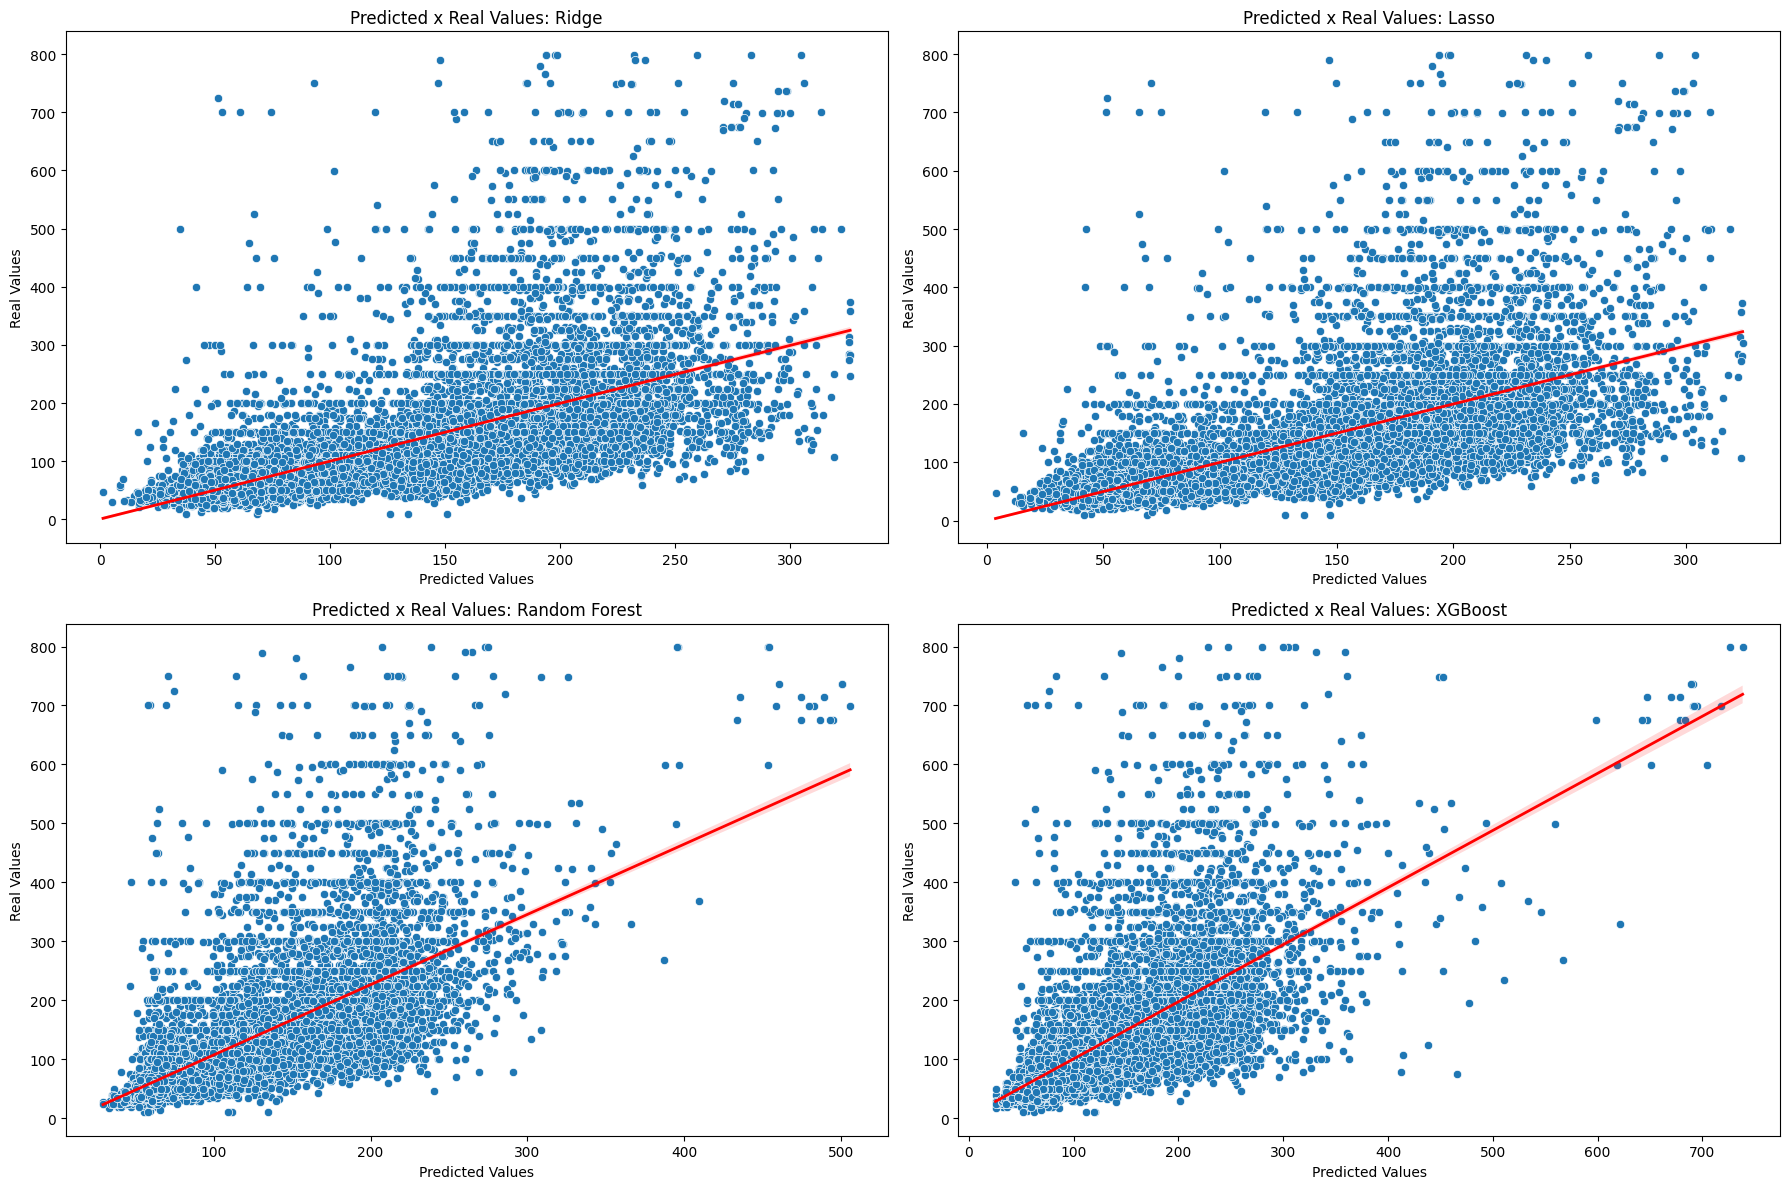

In [34]:
metrics_with_bairro.plot_pred_x_real(y_test_with_bairro, 2, 2)

In [35]:
df_metrics_with_bairro = pd.DataFrame.from_dict(model_report_with_bairro, orient='index')
df_metrics_with_bairro.drop(columns=["model", "y_pred"])

,mae,rmse,r2
Ridge,50.661979,81.680596,0.385204
Lasso,50.595229,81.728432,0.384484
Random Forest,44.607992,78.406032,0.433510
XGBoost,46.713136,76.992830,0.453747


### Observations:
- Even with `bairro`, no model improved in terms of accurately predicting high prices
- Ridge and Lasso saw a very small improvement in errors and `R²`
- Random forest and XGBoost had a worst performance when trained with `bairro`

## Residual Analysis

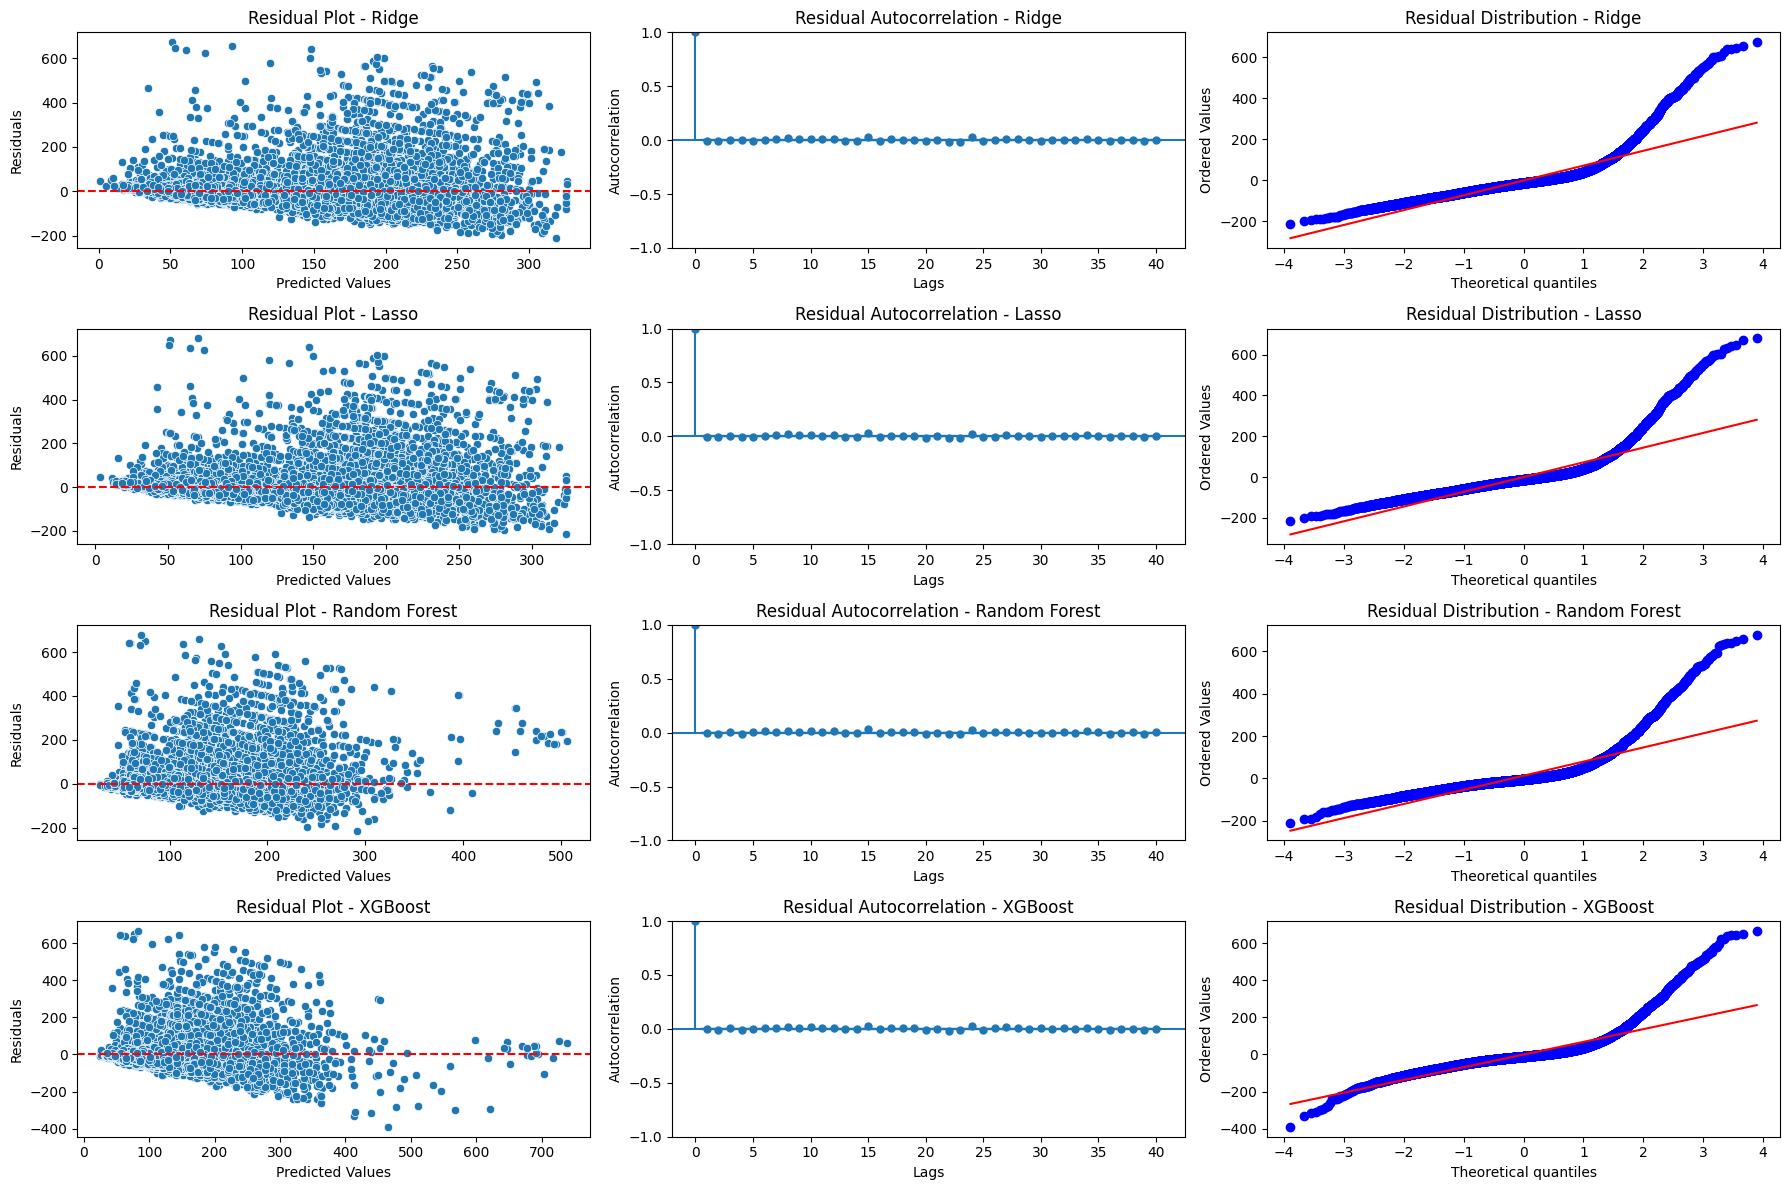

In [37]:
metrics_with_bairro.plot_residuals(y_test_with_bairro, 4, 3)

### Observations:
- In relation to the residuals, the exact same behavior e shown here in relation to the models trained without `bairro`

## Feature Importance

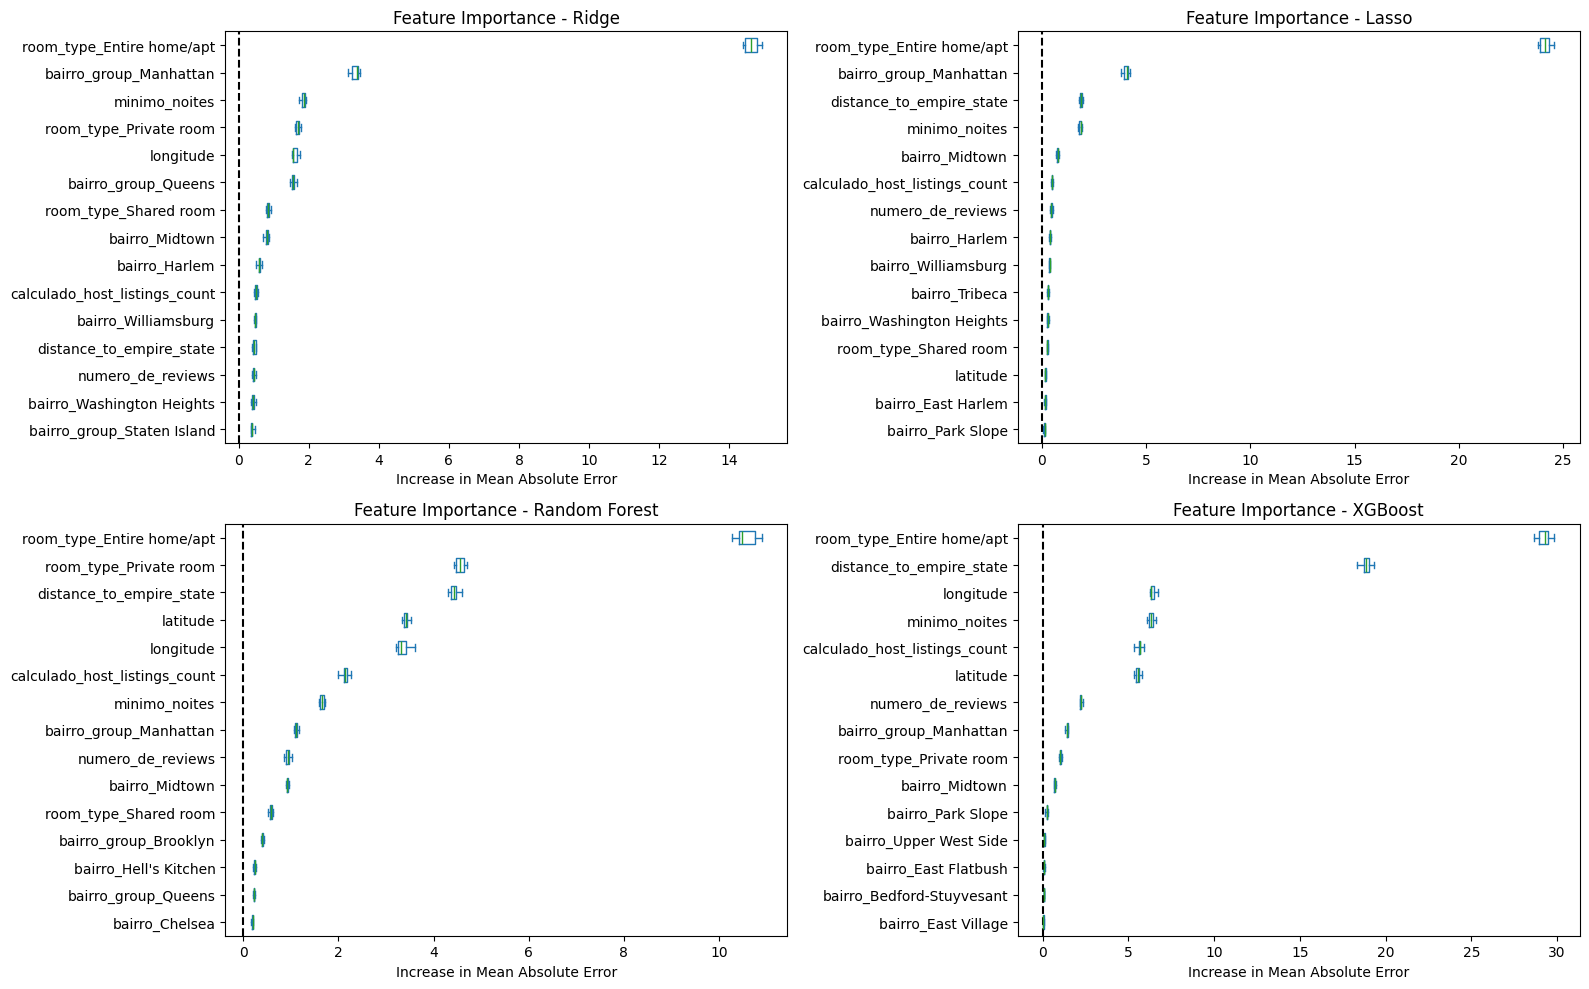

In [38]:
metrics_with_bairro.plot_feature_importance(y_test=y_test_with_bairro, X_test=X_test_with_bairro, rows=2, columns=2)

### Observations:
- Again, the category **Entire home/apt** from `room_type` is by far the most important feature for all models
- `distance_to_empire_state` losses the position of clear second best feature for new categories of `room_type` and `bairro_group` starts to become more important
- Ridge and Lasso were the models that most used the new features from `bairro`
- `bairro_midtown` is the only new feature that is common between all models, in terms of being in the top 15 most important features

## Conclusion

### For both trainings, all models had similar performances, with the ensemble ones having a lower `MAE` and `RSME` and higher `R²`. No model was considered ideal by the residual analysis, since there were no normally distributed residuals, which, combined with low R² scores, shows that no model was able to handle all non-linear relations between the data, nor was it able to capture the full variability of the data
### When looking at feature importance, the engineered feature `distance_to_empire_state` was the second most important feature of all models, rendering the feature engineering efforts a success
### Despite no model being considered ideal and the low R² scores, the best model in terms of metrics was the Random Forest trained without `bairro`, with a combination of lowest **MAE** and **RSME**, and highest **R²**

# Understanding the model

## Saving the model as a pkl file

In [6]:
import pickle

trainer.save_model("Random Forest - Rent Price Pred", 1, "../artifacts", "model")
model_path = "../artifacts/model.pkl"
with open(model_path, "rb") as f:
    model = pickle.load(f)

## Using SHAP to see how the features impact the model's predictions

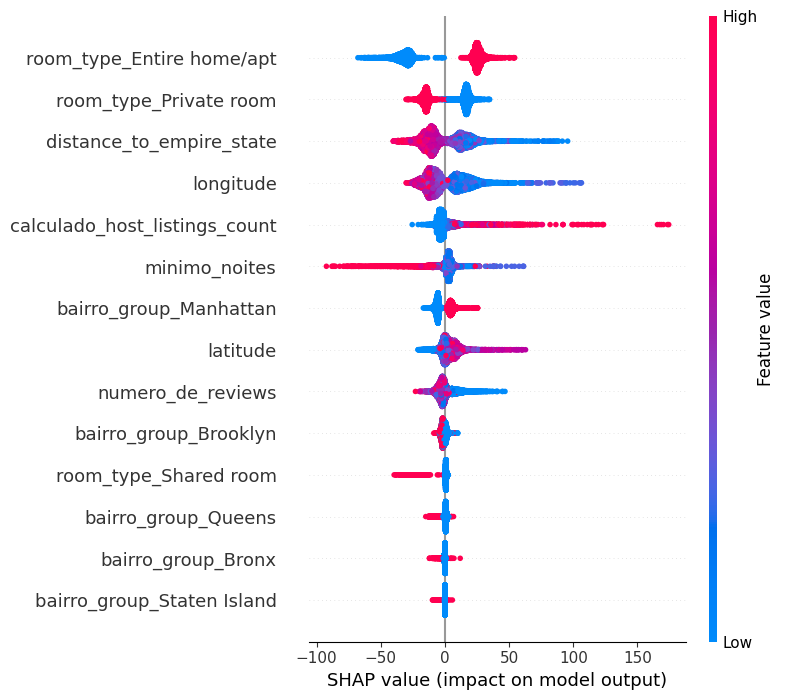

In [9]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_without_bairro)
shap.summary_plot(shap_values, X_test_without_bairro)

### The rank of important features for the model calculated by SHAP is in line with the other way used previously, by permuting the values of the features
### Using this graph, it's possible to see how each feature contributed to the model's predictions. The colors change depending on the value of the feature, with higher values being red and lower values being blue. With this, the x-axis shows the impact of that value on the model output. From this, it's possible to draw a few conclusions:
- The type of room has a very big impact on price, with the category **Entire home/apt** being a very strong factor to increase the price
- The new feature `distance_to_empire_state` behaves as it should, with a lower distance making the price go up. This makes sense since the Empire State Building is located in a touristic area, and it is a touristic attraction, so prices tend to be higher in an area like this
- A low requirement of minimal nights tend to increase the price
- Manhattan was the only neighborhood with a clear impact on the model output. If the ad is located in this neighborhood, the price tends to be higher
- The lower the number of reviews, the higher the price
### All of these points were already found during the EDA, and are now proven

# Using the best model

In [30]:
test_data = {"id": 2595,
            "nome": "Skylit Midtown Castle",
            "host_id": 2845,
            "host_name": "Jennifer",
            "bairro_group": "Manhattan",
            "bairro": "Midtown",
            "latitude": 40.75362,
            "longitude": -73.98377,
            "room_type": "Entire home/apt",
            "minimo_noites": 1,
            "numero_de_reviews": 45,
            "ultima_review": "2019-05-21",
            "reviews_por_mes": 0.38,
            "calculado_host_listings_count": 2,
            "disponibilidade_365": 355}
test_data = pd.DataFrame([test_data])
test_data_preprocessed = preprocess.preprocess_data(test_data, test_data=True, preprocessor="preprocessor_without_bairro")
test_data_preprocessed

,latitude,longitude,minimo_noites,numero_de_reviews,calculado_host_listings_count,distance_to_empire_state,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0.41577,-0.610764,-0.63093,0.833985,1.0,-1.82087,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [31]:
model.predict(test_data_preprocessed)[0]

228.44